### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
data = pd.read_csv('data/coupons.csv')

In [108]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

Answer question 2: First step is to find out which rows have missing information. To make a statistical evaluation there need to be enough data available. In data.info() it shows that multiple columns are missing data.
1. Car has most of the values missing

2. Bar/ CoffeeHouse/ CarryAway/ RestauranLessThan20/ Restaurant20To50 have only a few missing rows compared to the whole dataset


3. Decide what to do about your missing data -- drop, replace, other...

1. Column "cars" has only 108 entriers compared to the of 12k entries in the other columns. That means the information from "cars" are not suitable to make a good analysis and will not be considered
2. Bar/ CoffeeHouse/ CarryAway/ RestauranLessThan20/ Restaurant20To50: Decision to not drop those rows was made due to the other values in those rows can still be considered for analysis. In case the information in those columns will be needed later during the analysis the dataframe will be modified accordingly and dropping the rows without values

In [110]:
#Drop the car column
data = data.drop(columns=['car'])

4. What proportion of the total observations chose to accept the coupon? 



In [111]:
#Caclulate the proportion of the total observation who accepted the coupon
coupon_acceptance = data['Y'].mean()
print(f"Answer to question 4: Acceptance rate bar coupons: {coupon_acceptance:.2%}")

Answer to question 4: Acceptance rate bar coupons: 56.84%


Answer to question 4: 56.84% of the people accepted the coupon

5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, ' People who took the coupon')

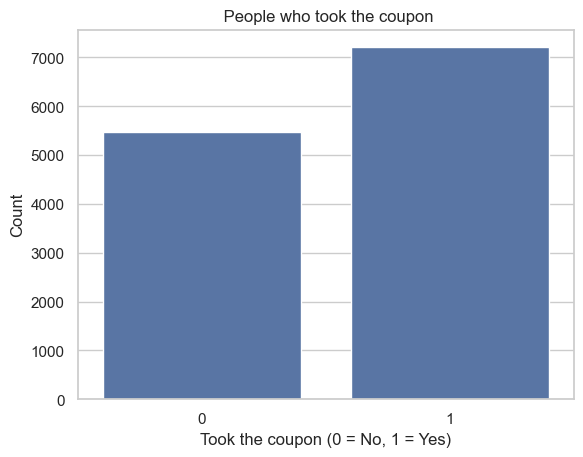

In [112]:
sns.barplot(x=data['Y'].value_counts().index, y=data['Y'].value_counts().values)
plt.xlabel('Took the coupon (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title(' People who took the coupon')

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temperature histogram')

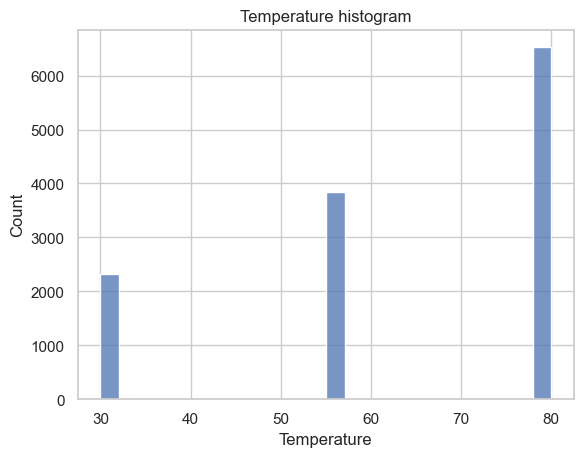

In [113]:
sns.histplot(x=data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature histogram')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [114]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

The new DataFrame is filtering the column "coupon" with the value "Bar". That removes the Coupons from all other Restaurants from the data frame. 

In [115]:
#Create the data frame that only contains the Bar data and a data frame if the Bar coupon was also choosen
bardata_all = data[(data['coupon'] == 'Bar')].dropna(subset=['Bar'])
bardata = bardata_all[bardata_all['Y'] == 1]


In [116]:
bardata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 13 to 12652
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           819 non-null    object
 1   passanger             819 non-null    object
 2   weather               819 non-null    object
 3   temperature           819 non-null    int64 
 4   time                  819 non-null    object
 5   coupon                819 non-null    object
 6   expiration            819 non-null    object
 7   gender                819 non-null    object
 8   age                   819 non-null    object
 9   maritalStatus         819 non-null    object
 10  has_children          819 non-null    int64 
 11  education             819 non-null    object
 12  occupation            819 non-null    object
 13  income                819 non-null    object
 14  Bar                   819 non-null    object
 15  CoffeeHouse           811 non-null    obje

2. What proportion of bar coupons were accepted?


In [117]:
#Acceptance rate bar coupons
coupons_accepted = bardata_all['Y'].mean()
print(f"Answer to question 2: Acceptance rate bar coupons: {coupons_accepted:.2%}")

Answer to question 2: Acceptance rate bar coupons: 41.03%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [118]:
#Investigate which values contain the Bar column
unique_values = bardata['Bar'].unique()
print(unique_values)

['never' 'less1' '1~3' 'gt8' '4~8']


In [119]:
#Total amount of people who go to the Bar more than 3 times
bar_more_than_three = bardata_all[bardata_all['Bar'].isin(['4~8', 'gt8'])]
#Total amount of people who go to the Bar more than 3 times and accepted the coupon
accepted_bar_more_than_three = bar_more_than_three['Y'].mean()
print(f"Answer to question 3: Acceptance rate of those who went to the Bar more than 3 times per month: {accepted_bar_more_than_three:.2%}")

Answer to question 3: Acceptance rate of those who went to the Bar more than 3 times per month: 76.88%


In [120]:
#Total amount of people who go to the Bar 3 times or fewer
bar_three_fewer = bardata_all[bardata_all['Bar'].isin(['never', 'less1', '1~3'])]
accepted_bar_more_three_fewer = bar_three_fewer['Y'].mean()
print(f"Answer to question 3: Acceptance rate of those who went to the Bar 3 times or fewer per month: {accepted_bar_more_three_fewer:.2%}")

Answer to question 3: Acceptance rate of those who went to the Bar 3 times or fewer per month: 37.06%


Analysis question 3: Drivers who go more than 3 times in the Bar per months are more likley to accept the coupon than people who go 3 times or less

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [121]:
#Investigate the values in the age column
unique_values_age = bardata_all['age'].unique()
print(unique_values_age)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [122]:
#Total amount of drivers who go to the Bar more than once a month and are over 25
bar_more_than_once_over_25 = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & (bardata_all['age'].isin(['46','26','31','41','50plus','36']))]
#Total amount of drivers who go to the Bar more than once a month and are over 25 and accepted the coupon
accepted_bar_more_than_once_over_25 = bar_more_than_once_over_25['Y'].mean()
print(f"Answer to question 4: Acceptance rate of those who go to the Bar more than once a month and are over 25 is: {accepted_bar_more_than_once_over_25:.2%}")
#All the otheres
bar_all_the_others = bardata_all[~(bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & (bardata_all['age'].isin(['46','26','31','41','50plus','36'])))]
#Acceptance rate of all the others
accepted_bar_all_the_others = bar_all_the_others['Y'].mean()
print(f"Answer to question 4: Acceptance rate of all the others is: {accepted_bar_all_the_others:.2%}")

Answer to question 4: Acceptance rate of those who go to the Bar more than once a month and are over 25 is: 69.52%
Answer to question 4: Acceptance rate of all the others is: 33.44%


Analysis question 4: Drivers who go to the Bar more than once a month and are over 25 are more likley to accept the coupon than all the others

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


There are 2 ways how to interpreate the assignment. Here both solutions are presented
1. Acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry vs all the others
2. Acceptance rate between "drivers who go to bars more than once a month and had passengers that were not a kid" and "drivers who go to bars more than once a month that had occupations other than farming, fishing, or forestry"

In [123]:
#Analyse the data in the column passanger and occupation
unique_values_passanger = bardata_all['passanger'].unique()
print(f"Unique value passangers: {unique_values_passanger}")
unique_values_occupation = bardata_all['occupation'].unique()
print(f"Unique value occupation: {unique_values_occupation}")

Unique value passangers: ['Kid(s)' 'Alone' 'Friend(s)' 'Partner']
Unique value occupation: ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


Solution 1

In [124]:
#Total amount of drivers who go to the Bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 
bar_more_than_once_not_kid_occupation_not_fa_fi_fo = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & ~(bardata_all['passanger'].isin(['Kid(s)'])) & ~(bardata_all['occupation'].isin(['Farming Fishing & Forestry']))]
#Acceptance rate of drivers who go to the Bar more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry 
acceptance_bar_more_than_once_not_kid_occupation_not_fa_fi_fo = bar_more_than_once_not_kid_occupation_not_fa_fi_fo['Y'].mean()
print(f"Answer to question 5, Solution 1: Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {acceptance_bar_more_than_once_not_kid_occupation_not_fa_fi_fo:.2%}")

Answer to question 5, Solution 1: Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32%


In [125]:
#Total amount of all the others
bar_more_than_once_not_kid_occupation_not_fa_fi_fo_all_others = bardata_all[~(bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & ~(bardata_all['passanger'].isin(['Kid(s)'])) & ~(bardata_all['occupation'].isin(['Farming Fishing & Forestry'])))]
#Acceptance rate of all the others
acceptance_bar_more_than_once_not_kid_occupation_not_fa_fi_fo_all_others = bar_more_than_once_not_kid_occupation_not_fa_fi_fo_all_others['Y'].mean()
print(f"Answer to question 5, Solution 1: Acceptance rate of all others: {acceptance_bar_more_than_once_not_kid_occupation_not_fa_fi_fo_all_others:.2%}")

Answer to question 5, Solution 1: Acceptance rate of all others: 29.48%


Analysis to question 5, Solution 1: Drivers who go to the bars more than once a month and had passengers that were not a kid and had other occupations than farming, fishing, or forestry are more likley to accept the coupon than the others

Solution 2

In [126]:
#Total amount of drivers who go to the Bar more than once a month and had passengers that were not a kid
bar_more_than_once_not_kid = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & ~(bardata_all['passanger'].isin(['Kid(s)']))]
#Acceptance rate of drivers who go to the Bar more than once a month and had passengers that were not a kid
acceptance_bar_more_than_once_not_kid = bar_more_than_once_not_kid['Y'].mean()
print(f"Answer to question 5, Solution 2: Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: {acceptance_bar_more_than_once_not_kid:.2%}")

Answer to question 5, Solution 2: Acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid: 71.32%


In [127]:
#Total amount of drivers who go to the Bar more than once a month and had occupations other than farming, fishing, or forestry 
bar_more_than_once_occupation_not_fa_fi_fo = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & ~(bardata_all['occupation'].isin(['Farming Fishing & Forestry']))]
#Acceptance rate of drivers who go to the Bar more than once a month and had occupations other than farming, fishing, or forestry 
acceptance_bar_more_than_once_occupation_not_fa_fi_fo = bar_more_than_once_occupation_not_fa_fi_fo['Y'].mean()
print(f"Answer to question 5, Solution 2: Acceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry: {acceptance_bar_more_than_once_occupation_not_fa_fi_fo:.2%}")

Answer to question 5, Solution 2: Acceptance rate of drivers who go to bars more than once a month and had occupations other than farming, fishing, or forestry: 68.79%


Analysis to question 5, Solution 2: Drivers who go to the bar more than once a month and have no kid as passangers are a bit more likley to accept the coupon than drivers who go to the bar more than once a month and have other occupation than farming, fishing, forestry

Answer: The acceptance rate of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is around 48%

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [128]:
unique_values_martial_status = bardata['maritalStatus'].unique()
print(f"Unique value Martial Status: {unique_values_martial_status}")
unique_values_age = bardata['age'].unique()
print(f"Unique value ages: {unique_values_age}")
unique_values_restaurant_less_than_20 = bardata['RestaurantLessThan20'].unique()
print(f"Unique value restaurant_less_than_20: {unique_values_restaurant_less_than_20}")
unique_values_income = bardata['income'].unique()
print(f"Unique value income: {unique_values_income}")


Unique value Martial Status: ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
Unique value ages: ['21' '46' '26' '31' '50plus' '41' '36' 'below21']
Unique value restaurant_less_than_20: ['4~8' '1~3' 'less1' 'gt8' 'never' nan]
Unique value income: ['$37500 - $49999' '$62500 - $74999' '$75000 - $87499' '$12500 - $24999'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [129]:
#Total amount of drivers who go to the Bar more than once a month, had passangers that were not a kid and were not widowed 
bar_more_than_once_not_kid_not_widowed = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & (bardata_all['passanger'] != 'Kid(s)') & (bardata_all['maritalStatus'] != 'Widowed')]
#Acceptance rate total amount of drivers who go to the Bar more than once a month, had passangers that were not a kid and were not widowed
acceptance_bar_more_than_once_not_kid_not_widowed = bar_more_than_once_not_kid_not_widowed['Y'].mean()
print(f"Answer to question 6: Acceptance rate of drivers who go to bars more than once a month and had passangers that were not a kid and were not widowed : {acceptance_bar_more_than_once_not_kid_not_widowed:.2%}")

Answer to question 6: Acceptance rate of drivers who go to bars more than once a month and had passangers that were not a kid and were not widowed : 71.32%


In [130]:
#Total amount of drivers who go to the Bar more than once a month and are under the age of 30
bar_more_than_once_below_30 = bardata_all[bardata_all['Bar'].isin(['1~3', '4~8', 'gt8']) & (bardata_all['age'].isin(['21','26','below21']))]
#Acceptance rate total amount of drivers who go to the Bar more than once a month, had passangers that were not a kid and were not widowed
acceptance_bar_more_than_once_below_30 = bar_more_than_once_below_30['Y'].mean()
print(f"Answer to question 6: Acceptance rate of drivers who go to bars more than once a month and are below 30 : {acceptance_bar_more_than_once_below_30:.2%}")

Answer to question 6: Acceptance rate of drivers who go to bars more than once a month and are below 30 : 72.17%


For the next question the assumption was made that the coupon acceptance related to the cheap Restaurant and not to the Bar anymore

In [131]:
#Delete the rows who don't have values in the restaurant_less_than_20 column
bardata_all = data[(data['coupon'] == 'Bar')].dropna(subset=['Bar'])
restaurant_data_less_than_20_all = data[(data['coupon'] == 'Restaurant(<20)')].dropna(subset=['RestaurantLessThan20'])
#Total amount of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. 
cheap_restaurant_more_than_four_income_less_50 = restaurant_data_less_than_20_all[(restaurant_data_less_than_20_all['RestaurantLessThan20'].isin(['4~8','gt8'])) &
                                                                                  (restaurant_data_less_than_20_all['income'].isin(['$37500 - $49999','$12500 - $24999', '$25000 - $37499','Less than $12500']))]
#Acceptance rate total amount of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K. 
acceptance_cheap_restaurant_more_than_four_income_less_50 = cheap_restaurant_more_than_four_income_less_50['Y'].mean()
print(f"Answer to question 6: Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : {acceptance_cheap_restaurant_more_than_four_income_less_50:.2%}")

Answer to question 6: Acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K : 71.09%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

1. Drivers who are more likley to accept bar coupons are younger than 30 and older than 25 are very likley to accept the coupon. As soon as there are kids as a passanger the it is getting less likley that they accept the coupon. How more the drivers go in the Bar the higher is the chance that they accept the coupon
2. The data suggests that individuals with lower incomes tend to prefer inexpensive restaurants. However, since only drivers with low incomes were evaluated, it is also plausible that drivers in general prefer cheaper restaurants, not exclusively those with lower incomes

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [132]:
unique_values_coupon = data['coupon'].unique()
print(f"Unique value Coupon: {unique_values_coupon}")

Unique value Coupon: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


Since I love coffe I am exploring the Coffee House coupon data

In [133]:
#Created new Dataframe for the Coffee House coupon
coffee_data = data[(data['coupon'] == 'Coffee House')].dropna(subset=['CoffeeHouse'])

1. I want to figure out of the acceptance rate of a coffe coupon is higher within females or males

In [134]:
unique_values_gender = data['gender'].unique()
print(f"Unique value gender: {unique_values_gender}")
unique_values_coffe_house = data['CoffeeHouse'].unique()
print(f"Unique value Coffee House: {unique_values_coffe_house}")

Unique value gender: ['Female' 'Male']
Unique value Coffee House: ['never' 'less1' '4~8' '1~3' 'gt8' nan]


In [135]:
#Total amount of drivers who go to the Coffee House more than once a month and are female
coffee_female = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Female')]
#Total amount of drivers who go to the Coffee House more than once a month and are male
coffee_male = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Male')]
#Acceptance rate of drivers who go to the Coffee House more than once a month and are female
accepted_coffee_female = coffee_female['Y'].mean()
print(f"Answer to question 1: Acceptance rate of female drivers: {accepted_coffee_female:.2%}")
#Acceptance rate of drivers who go to the Coffee House more than once a month and are male
accepted_coffee_male = coffee_male['Y'].mean()
print(f"Answer to question 1: Acceptance rate of male drivers: {accepted_coffee_male:.2%}")

Answer to question 1: Acceptance rate of female drivers: 67.26%
Answer to question 1: Acceptance rate of male drivers: 64.64%


Analysis first question. There is not a significant difference between female and male drivers to accept the Coffee House Coupon

2. Do wealthy drivers (more than 50k annual income) who go more than once per month to the Coffee House accept the Coupon more often than poor drivers?

In [136]:
#Total amount of drivers who go more than once a month to the Coffee House and have an income of 50k or above
coffee_more_than_50k = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['income'].isin(['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More' , '$87500 - $99999']))]
#Total amount of drivers who go more than once a month to the Coffee House and have an income below 50k 
coffee_less_than_50k = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & ~(coffee_data['income'].isin(['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More' , '$87500 - $99999']))]
#Acceptance rate of drivers who go more than once a month to the Coffee House and have an income of 50k or above
accepted_coffee_more_than_50k = coffee_more_than_50k['Y'].mean()
print(f"Answer to question 2: Acceptance rate of wealthy drivers who go more than once per month to the Coffee House: {accepted_coffee_more_than_50k:.2%}")
#Acceptance rate of drivers who go more than once a month to the Coffee House and have an income below 50k 
accepted_coffee_less_than_50k = coffee_less_than_50k['Y'].mean()
print(f"Answer to question 2: Acceptance rate of poor drivers who go more than once per month to the Coffee House: {accepted_coffee_less_than_50k:.2%}")

Answer to question 2: Acceptance rate of wealthy drivers who go more than once per month to the Coffee House: 61.76%
Answer to question 2: Acceptance rate of poor drivers who go more than once per month to the Coffee House: 69.76%


Analysis second questions. Drivers who have less income are more likley to accept the coupon but not significantly

3. Does the sun has an impact on a female or male driver?

In [137]:
unique_values_weather = data['weather'].unique()
print(f"Unique value weather: {unique_values_weather}")

Unique value weather: ['Sunny' 'Rainy' 'Snowy']


In [138]:
#Total amount of drivers who go to the Coffee House more than once a month and are female when it is sunny
coffee_female_sunny = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Female') & (coffee_data['weather'] == 'Sunny')]
#Total amount of drivers who go to the Coffee House more than once a month and are male when it is sunny
coffee_male_sunny = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Male') & (coffee_data['weather'] == 'Sunny')]
#Acceptance rate of drivers who go to the Coffee House more than once a month and are female when it is sunny
accepted_coffee_female_sunny = coffee_female_sunny['Y'].mean()
print(f"Answer to question 1: Acceptance rate of female drivers when it is sunny: {accepted_coffee_female_sunny:.2%}")
#Acceptance rate of drivers who go to the Coffee House more than once a month and are male when it is sunny
accepted_coffee_male_sunny = coffee_male_sunny['Y'].mean()
print(f"Answer to question 1: Acceptance rate of male drivers when it is sunny: {accepted_coffee_male_sunny:.2%}")

Answer to question 1: Acceptance rate of female drivers when it is sunny: 69.00%
Answer to question 1: Acceptance rate of male drivers when it is sunny: 65.70%


Analysis question 3: When the sun comes out the acceptence rate goes up for both slightly

4. That leads to the question. Is the rate going down when it is Rainy or Snowy?

In [139]:
#Total amount of drivers who go to the Coffee House more than once a month and are female when it is snowy
coffee_female_snowy = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Female') & (coffee_data['weather'] == 'Snowy')]
#Total amount of drivers who go to the Coffee House more than once a month and are male when it is snowy
coffee_male_snowy = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Male') & (coffee_data['weather'] == 'Snowy')]
#Acceptance rate of drivers who go to the Coffee House more than once a month and are female when it is snowy
accepted_coffee_female_snowy = coffee_female_snowy['Y'].mean()
print(f"Answer to question 4: Acceptance rate of female drivers when it is snowy: {accepted_coffee_female_snowy:.2%}")
#Acceptance rate of drivers who go to the Coffee House more than once a month and are male when it is snowy
accepted_coffee_male_snowy = coffee_male_snowy['Y'].mean()
print(f"Answer to question 4: Acceptance rate of male drivers when it is snowy: {accepted_coffee_male_snowy:.2%}")

Answer to question 4: Acceptance rate of female drivers when it is snowy: 49.33%
Answer to question 4: Acceptance rate of male drivers when it is snowy: 57.53%


In [140]:
#Total amount of drivers who go to the Coffee House more than once a month and are female when it is Rainy
coffee_female_Rainy = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Female') & (coffee_data['weather'] == 'Rainy')]
#Total amount of drivers who go to the Coffee House more than once a month and are male when it is Rainy
coffee_male_Rainy = coffee_data[(coffee_data['CoffeeHouse'].isin(['4~8' ,'1~3', 'gt8'])) & (coffee_data['gender'] == 'Male') & (coffee_data['weather'] == 'Rainy')]
#Acceptance rate of drivers who go to the Coffee House more than once a month and are female when it is Rainy
accepted_coffee_female_Rainy = coffee_female_Rainy['Y'].mean()
print(f"Answer to question 4: Acceptance rate of female drivers when it is Rainy: {accepted_coffee_female_Rainy:.2%}")
#Acceptance rate of drivers who go to the Coffee House more than once a month and are male when it is Rainy
accepted_coffee_male_Rainy = coffee_male_Rainy['Y'].mean()
print(f"Answer to question 4: Acceptance rate of male drivers when it is Rainy: {accepted_coffee_male_Rainy:.2%}")

Answer to question 4: Acceptance rate of female drivers when it is Rainy: 63.79%
Answer to question 4: Acceptance rate of male drivers when it is Rainy: 57.14%


Analysis to question 4. Females accept the coupon less when it is snowing but don't care much if it is raining or sunny. For male both time the acceptance rate is dropping by around 10% if it is not sunny

In [141]:
combined_weather_data = pd.concat([coffee_male_snowy, coffee_female_snowy, coffee_male_sunny, coffee_female_sunny, coffee_male_Rainy, coffee_female_Rainy], ignore_index=True)

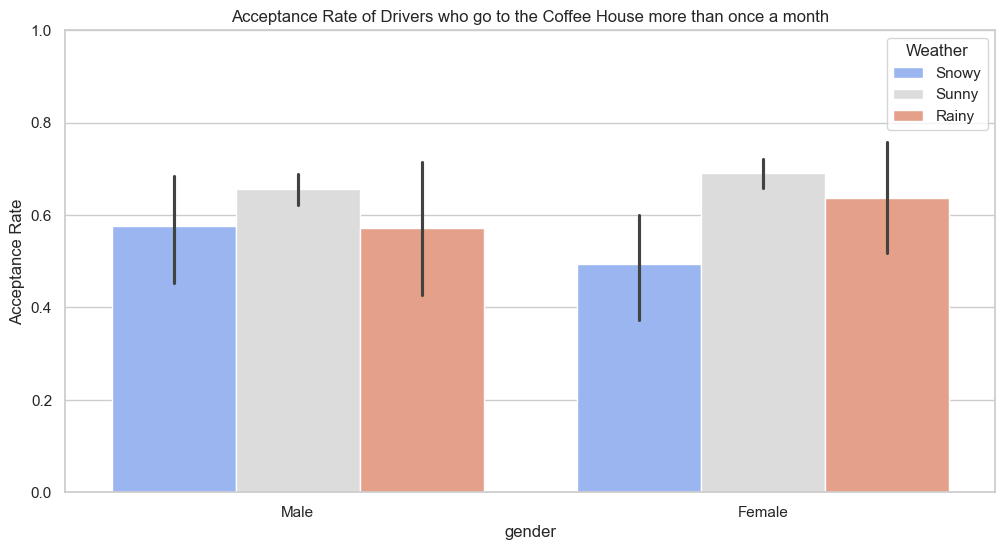

In [142]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='gender', y='Y', hue='weather', data=combined_weather_data, palette='coolwarm')

plt.title('Acceptance Rate of Drivers who go to the Coffee House more than once a month')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.legend(title='Weather')

In [143]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3924 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3924 non-null   object
 1   passanger             3924 non-null   object
 2   weather               3924 non-null   object
 3   temperature           3924 non-null   int64 
 4   time                  3924 non-null   object
 5   coupon                3924 non-null   object
 6   expiration            3924 non-null   object
 7   gender                3924 non-null   object
 8   age                   3924 non-null   object
 9   maritalStatus         3924 non-null   object
 10  has_children          3924 non-null   int64 
 11  education             3924 non-null   object
 12  occupation            3924 non-null   object
 13  income                3924 non-null   object
 14  Bar                   3908 non-null   object
 15  CoffeeHouse           3924 non-null   obje

In [144]:
#Investigate the unique value for each of the columns to find interesting values to analyze 
for col in coffee_data.columns:
    unique_values = coffee_data[col].unique()
    print(f"Unique values in column '{col}':")
    print(unique_values)
    print()

Unique values in column 'destination':
['No Urgent Place' 'Home' 'Work']

Unique values in column 'passanger':
['Friend(s)' 'Kid(s)' 'Alone' 'Partner']

Unique values in column 'weather':
['Sunny' 'Rainy' 'Snowy']

Unique values in column 'temperature':
[80 55 30]

Unique values in column 'time':
['10AM' '2PM' '6PM' '7AM' '10PM']

Unique values in column 'coupon':
['Coffee House']

Unique values in column 'expiration':
['2h' '1d']

Unique values in column 'gender':
['Female' 'Male']

Unique values in column 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Unique values in column 'maritalStatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Unique values in column 'has_children':
[1 0]

Unique values in column 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Unique values in column 'occupation':
['Unemployed' 'Architecture & Engineerin

5. At what time do drivers in the morning who frequent the coffee house regularly (more than 8 times a month) and have accepted the coupon typically visit and which education do they have?

In [145]:
#Dataframe for plot analysis. Everyone who goes more than 8 times per month to the Coffee House and accepts the Coupon
coffee_time_gt8 = coffee_data[(coffee_data['CoffeeHouse'] == 'gt8') & (coffee_data['Y'] == 1) & (coffee_data['time'].isin(['10AM','7AM']))]

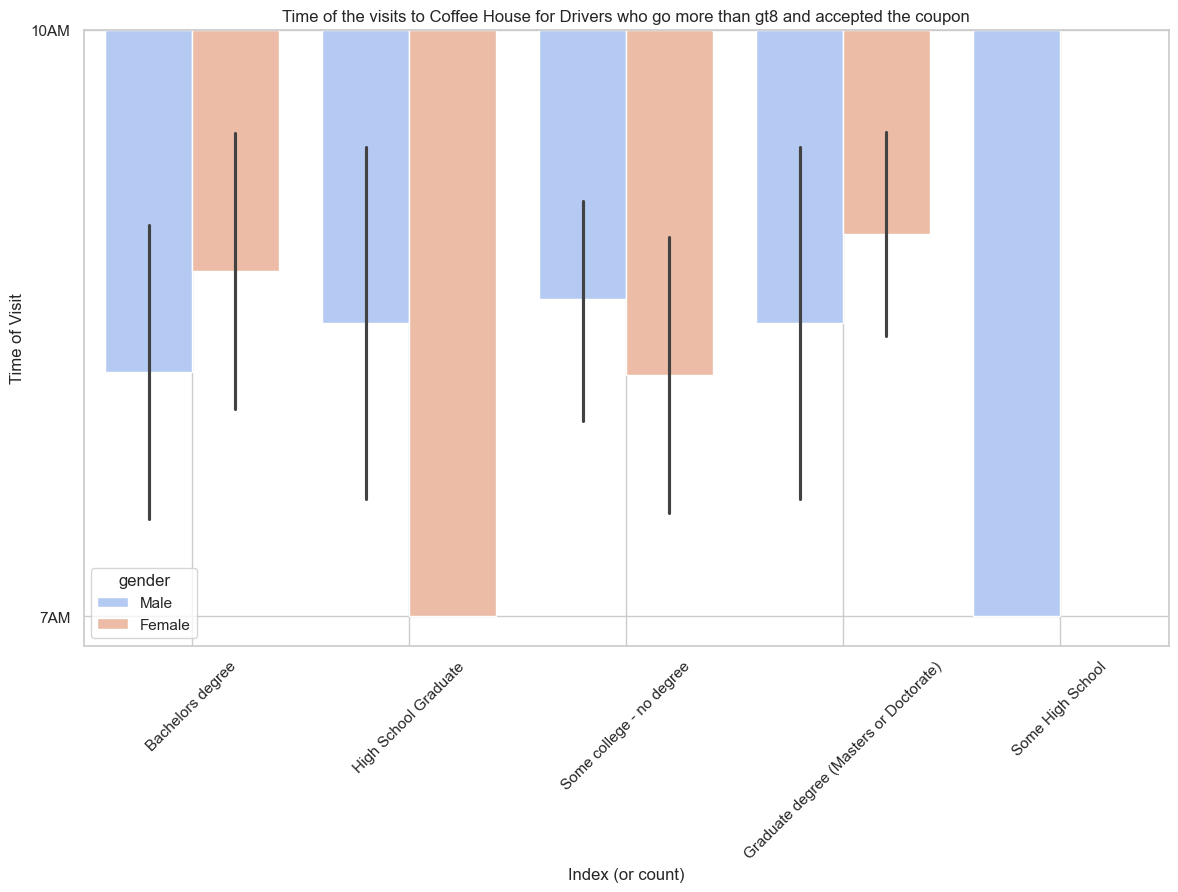

In [146]:
plt.figure(figsize=(14, 8))
sns.barplot(x='education', y='time', hue='gender', data=coffee_time_gt8, palette='coolwarm')
plt.title('Time of the visits to Coffee House for Drivers who go more than gt8 and accepted the coupon')
plt.xlabel('Index (or count)')
plt.ylabel('Time of Visit')
plt.xticks(rotation=45)
plt.grid(True)

Answer question 5: Females who are in the college and still study go earlier to the Coffe House than females who have a Bachelor or Graduate degree. Does with a High School degree can't be used for an analysis since there is only one value.
Males with a Bachelor or Graduate degree go a bit more early than males without